In [1]:
import os
import re
from zipfile import ZipFile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] =  os.getcwd()
!kaggle datasets download -d mexwell/womens-e-commerce-clothing-reviews

Dataset URL: https://www.kaggle.com/datasets/mexwell/womens-e-commerce-clothing-reviews
License(s): CC0-1.0
 72% 2.00M/2.79M [00:01<00:00, 2.07MB/s]
100% 2.79M/2.79M [00:01<00:00, 2.36MB/s]


In [3]:
def zip_file_extraction(folders = ['dataset'], file_path = os.getcwd()):
    """
    This Fuction will take input of foldername (default 'dataset')as list.
    folder path (default 'currect dir')

    """
    for folder in folders:
        folder_path = os.path.join(file_path,folder)
        if not os.path.exists(folder_path):
            os.mkdir(folder)
        else:
            print('Folder already present')
    folder_path = os.path.join(file_path,'dataset')
    for file in os.listdir(file_path):
        if file.endswith('.zip'):
            with ZipFile(file) as zobj:
                zobj.extractall(folder_path)

In [4]:
zip_file_extraction()

In [5]:
def data_reading(folder,file_path = os.getcwd()):
  path = os.path.join(file_path,folder)
  for file in os.listdir(path):
    if file.endswith('.csv'):
      print(file)
      print(path)
      f = os.path.join(path,file)
      df = pd.read_csv(f,sep = ';', on_bad_lines= 'skip')

  return df

In [6]:
data = data_reading('dataset')

Women_s_E-Commerce_Clothing_Reviews_1594_1.csv
/content/dataset


In [7]:
data.head()

,Unnamed: 0,Clothing.ID,Age,Title,Review.Text,Rating,Recommended.IND,Positive.Feedback.Count,Division.Name,Department.Name,Class.Name
0,1,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,2,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,3,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,4,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,5,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing.ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review.Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended.IND          23486 non-null  int64 
 6   Positive.Feedback.Count  23486 non-null  int64 
 7   Division.Name            23472 non-null  object
 8   Department.Name          23472 non-null  object
 9   Class.Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [10]:
print('Columns\t\t\tNull Count')
print("**"*18)
print(data.isna().sum())
print("**"*18)
print("Total Null value: ",data.isna().sum().sum())

Columns			Null Count
************************************
Clothing.ID                   0
Age                           0
Title                      3810
Review.Text                 845
Rating                        0
Recommended.IND               0
Positive.Feedback.Count       0
Division.Name                14
Department.Name              14
Class.Name                   14
dtype: int64
************************************
Total Null value:  4697


In [11]:
print('Columns\t\t\tNull Count%')
print("**"*18)
print(data.isna().sum() / data.shape[0]*100)
print("**"*18)
print("Total Null value: ",data.isna().sum().sum()/data.shape[0]*100)

Columns			Null Count%
************************************
Clothing.ID                 0.000000
Age                         0.000000
Title                      16.222430
Review.Text                 3.597888
Rating                      0.000000
Recommended.IND             0.000000
Positive.Feedback.Count     0.000000
Division.Name               0.059610
Department.Name             0.059610
Class.Name                  0.059610
dtype: float64
************************************
Total Null value:  19.99914842885123


In [12]:
#dropping nan
data.dropna(inplace = True)

In [13]:
print('Columns\t\t\tNull Count%')
print("**"*18)
print(data.isna().sum() / data.shape[0]*100)
print("**"*18)
print("Total Null value: ",data.isna().sum().sum()/data.shape[0]*100)

Columns			Null Count%
************************************
Clothing.ID                0.0
Age                        0.0
Title                      0.0
Review.Text                0.0
Rating                     0.0
Recommended.IND            0.0
Positive.Feedback.Count    0.0
Division.Name              0.0
Department.Name            0.0
Class.Name                 0.0
dtype: float64
************************************
Total Null value:  0.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19662 entries, 2 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing.ID              19662 non-null  int64 
 1   Age                      19662 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review.Text              19662 non-null  object
 4   Rating                   19662 non-null  int64 
 5   Recommended.IND          19662 non-null  int64 
 6   Positive.Feedback.Count  19662 non-null  int64 
 7   Division.Name            19662 non-null  object
 8   Department.Name          19662 non-null  object
 9   Class.Name               19662 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.7+ MB


In [15]:
#renaming the columns
cols = {

        'Clothing.ID' : "Id",
        'Review.Text' : 'Review',
        'Recommended.IND' : 'Recommended',
        'Positive.Feedback.Count' : 'Feedback',
        'Division.Name' : 'Division',
        'Department.Name' : 'Department',
        'Class.Name' : 'Class'
}

data.rename(columns = cols, inplace= True)

In [16]:
data.columns

Index(['Id', 'Age', 'Title', 'Review', 'Rating', 'Recommended', 'Feedback',
       'Division', 'Department', 'Class'],
      dtype='object')

In [17]:
def feature_joining(row):
    combine = ""
    combine += f"Product is of Division: {row['Division']}, department: {row['Department']}, class: {row['Class']}. "
    combine += f"I am {str(row['Age'])} years old. I rate the product {str(row['Rating'])}. "
    combine += f"Title of the review is {row['Title']}. "
    combine += row['Review']
    return combine

In [18]:
data['Combine_text'] = data.apply(feature_joining, axis = 1)

In [19]:
data.reset_index(drop = True, inplace =True)

In [20]:
data['Combine_text'][0]

'Product is of Division: General, department: Dresses, class: Dresses. I am 60 years old. I rate the product 3. Title of the review is Some major design flaws. I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [21]:
def preprocessing(text):
  text = text.strip().lower()
  text = re.sub("[^A-Za-z0-9]"," ",text)
  words = text.split(" ")
  STOPWORDS = set(stopwords.words('english'))
  lemitizer = WordNetLemmatizer()
  clean_words = [lemitizer.lemmatize(word) for word in words if word not in STOPWORDS]
  return ' '.join(clean_words)

In [22]:
data['Combine_text'] = data['Combine_text'].apply(preprocessing)

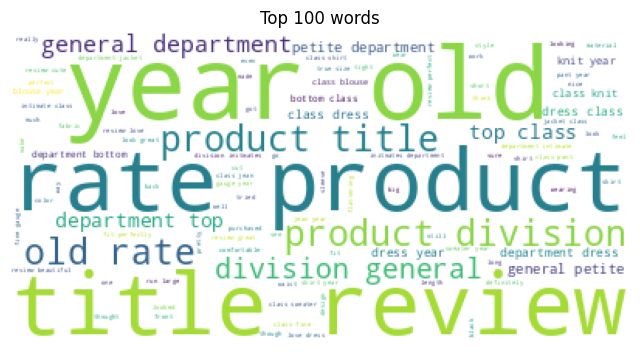

In [23]:
%matplotlib inline
from wordcloud import WordCloud
text = ' '.join(data['Combine_text'].values)
wc = WordCloud(background_color= 'white', max_words = 100).generate(text)
plt.figure(figsize=(8,8))
plt.imshow(wc)
plt.title('Top 100 words')
plt.axis('off')
plt.show()

In [24]:
#data splitting
X = data['Combine_text']
Y = data['Recommended']

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, random_state= 42, test_size= 0.2)

In [56]:
from keras.preprocessing.text import Tokenizer

token = Tokenizer(oov_token= "<unknown>")
token.fit_on_texts(X_train)

In [57]:
train_sequence = token.texts_to_sequences(X_train)
test_sequence = token.texts_to_sequences(X_test)

In [58]:
length = []
for i in train_sequence:
  length.append(len(i))
max_review_length = max(length)
print("Max Review length: ", max_review_length)

Max Review length:  87


In [59]:
from keras.utils import pad_sequences
train_sequence = pad_sequences(train_sequence, maxlen= max_review_length, padding= 'post')
test_sequence = pad_sequences(test_sequence, maxlen= max_review_length, padding= 'post')

In [60]:
unique_word_count = len(token.word_index)
unique_word_count

11567

In [61]:
from tensorflow import keras
def get_model(max_len = max_review_length, max_words = unique_word_count, ):
  input = keras.Input(name = 'input', shape = [max_len,])
  layer = keras.layers.Embedding(input_dim = max_words, input_length = max_len, output_dim = 100, name = 'Embedding')(input)
  layer = keras.layers.Bidirectional(keras.layers.LSTM(128),name = 'Bidirectional')(layer)
  layer = keras.layers.Dropout(0.5)(layer)
  layer = keras.layers.Dense(64, activation = 'relu')(layer)
  layer = keras.layers.Dropout(0.3)(layer)
  layer = keras.layers.Dense(64, activation = 'relu')(layer)
  layer = keras.layers.Dense(64, activation = 'relu', kernel_regularizer=keras.regularizers.L2(0.01))(layer)
  layer = keras.layers.Dropout(0.3)(layer)
  layer = keras.layers.Dense(64, activation = 'relu',kernel_regularizer=keras.regularizers.L2(0.01))(layer)
  output = keras.layers.Dense(1, activation = 'sigmoid')(layer)
  model = keras.Model(input, output)
  model.compile(optimizer = 'adam',
                loss = 'binary_crossentropy',
                metrics = ['accuracy'])
  return model


In [62]:
model = get_model()

In [63]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 87)]              0         
                                                                 
 Embedding (Embedding)       (None, 87, 100)           1156700   
                                                                 
 Bidirectional (Bidirection  (None, 256)               234496    
 al)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 256)               0         
                                                                 
 dense_23 (Dense)            (None, 64)                16448     
                                                                 
 dropout_14 (Dropout)        (None, 64)                0         
                                                           

In [64]:
history = model.fit(train_sequence, np.array(y_train), epochs = 50, validation_split = 0.2)

Epoch 1/50
394/394 [==============================] - 26s 54ms/step - loss: 0.5717 - accuracy: 0.8842 - val_loss: 0.2061 - val_accuracy: 0.9393
Epoch 2/50
394/394 [==============================] - 8s 21ms/step - loss: 0.1897 - accuracy: 0.9369 - val_loss: 0.1549 - val_accuracy: 0.9425
Epoch 3/50
394/394 [==============================] - 6s 15ms/step - loss: 0.1522 - accuracy: 0.9483 - val_loss: 0.1563 - val_accuracy: 0.9383
Epoch 4/50
394/394 [==============================] - 7s 18ms/step - loss: 0.1195 - accuracy: 0.9588 - val_loss: 0.2233 - val_accuracy: 0.9326
Epoch 5/50
394/394 [==============================] - 6s 14ms/step - loss: 0.0920 - accuracy: 0.9692 - val_loss: 0.2588 - val_accuracy: 0.9250
Epoch 6/50
394/394 [==============================] - 7s 18ms/step - loss: 0.0704 - accuracy: 0.9793 - val_loss: 0.1819 - val_accuracy: 0.9355
Epoch 7/50
394/394 [==============================] - 6s 16ms/step - loss: 0.0599 - accuracy: 0.9831 - val_loss: 0.4251 - val_accuracy: 0.924

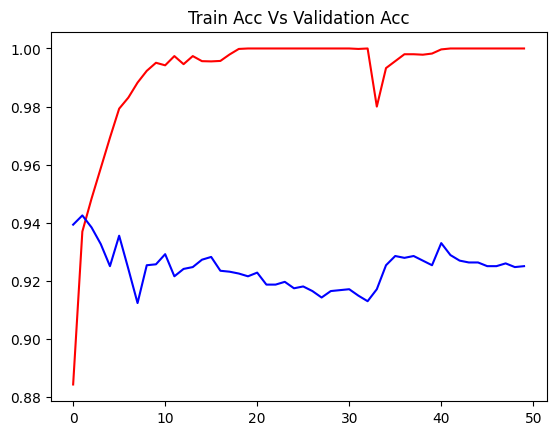

In [65]:
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'b')
plt.title("Train Acc Vs Validation Acc")
plt.show()

In [73]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
y_pred = model.predict(test_sequence)
y_pred = (y_pred > 0.5).astype(int)
print("**"*20)
print(classification_report(y_test, y_pred))
print("**"*20)
print(f"f1 Score: ", round(f1_score(y_test, y_pred),2))

123/123 [==============================] - 1s 5ms/step
****************************************
              precision    recall  f1-score   support

           0       0.83      0.78      0.80       700
           1       0.95      0.97      0.96      3233

    accuracy                           0.93      3933
   macro avg       0.89      0.87      0.88      3933
weighted avg       0.93      0.93      0.93      3933

****************************************
f1 Score:  0.96


<Axes: >

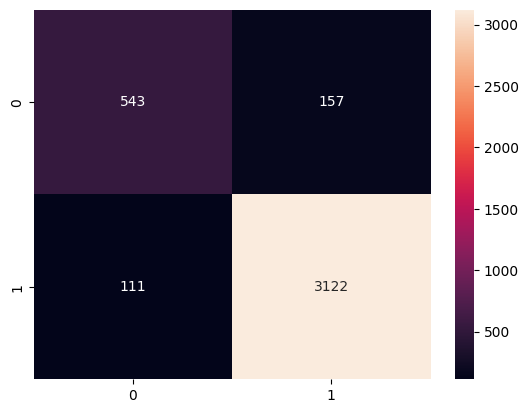

In [74]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True, fmt = '.0f')

In [77]:
model.save('women_clothing.keras')

In [81]:
model1 = keras.models.load_model('women_clothing.h5')

In [82]:
model1.predict(test_sequence)

123/123 [==============================] - 1s 5ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)